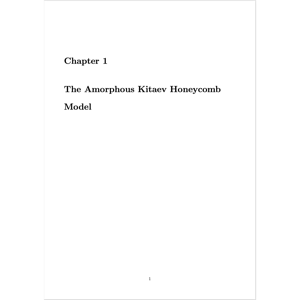

In [12]:
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
original_image = Image.open("chapter.png")

def expand2square(pil_img, background_color):
    width, height = pil_img.size
    if width == height:
        return pil_img
    elif width > height:
        result = Image.new(pil_img.mode, (width, width), background_color)
        result.paste(pil_img, (0, (width - height) // 2))
        return result
    else:
        result = Image.new(pil_img.mode, (height, height), background_color)
        result.paste(pil_img, ((height - width) // 2, 0))
        return result

original_image = expand2square(original_image, (255,255,255))

im = original_image.convert("L").resize((300, 300))
im

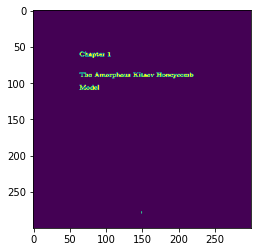

In [13]:
src = np.array(im) < 200
plt.imshow(src)

CPU times: user 574 ms, sys: 99 ms, total: 673 ms
Wall time: 689 ms


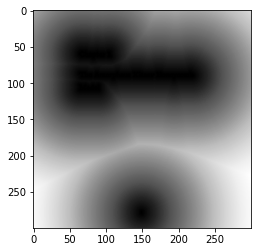

In [14]:
%%time
pixels = np.array(np.where(src))[:, :]

I = np.arange(src.shape[0]).reshape(-1,1,1)
J = np.arange(src.shape[1]).reshape(1,-1,1)

groups = 50

def compute(k):
    i, j = pixels[:, k::groups].reshape(2, 1, 1, -1)
    dist = np.min(np.sqrt((I - i)**2 + (J - j)**2), axis = -1, initial = 1000)
    return dist

dist = np.min([compute(k) for k in range(groups)], axis = 0)

d =  1 - dist / np.max(dist)
plt.imshow(d, cmap = 'Greys')

(5000, 2)


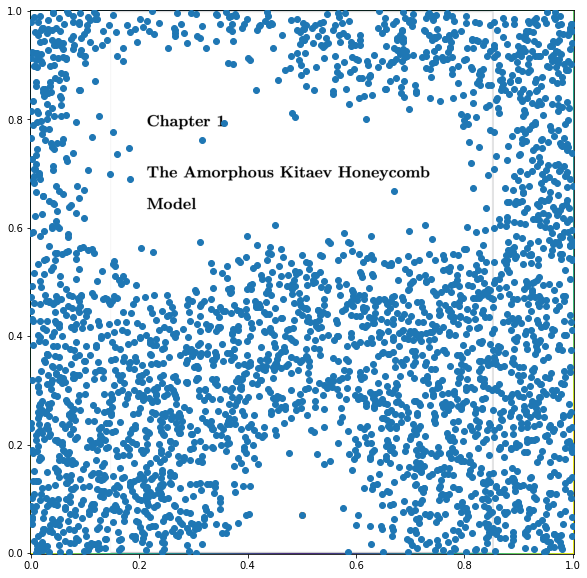

In [15]:
rng = np.random.default_rng(2264263456734)
points = rng.random((5000, 2))
print(points.shape)

x, y = np.linspace(0,1,dist.shape[0]), np.linspace(0,1,dist.shape[1])

f, ax = plt.subplots(figsize = (10,10))
ax.pcolor(x, y, dist[::-1, ::1], zorder = -1)

import scipy.interpolate
value_at_points  = scipy.interpolate.interpn([x,y], d[::-1, :].T, points)
r = rng.random(points.shape[0])

a = 20
b = 0.7
def l(x): return a*(x - b)
def s(x): return  np.exp(x) / (1 +  np.exp(x))
mask = s(l(value_at_points)) < r

# mask = value_at_points < 0.9
ax.imshow(original_image, extent = (0,1,0,1))
points = np.concatenate([points[mask], [[0.5, 0.07],]])

ax.scatter(*points.T, zorder = 10)

ax.scatter(0.5, 0.07)

In [16]:
from koala import voronization, graph_color
from matplotlib import pyplot as plt
from koala import plotting as pl
import numpy as np

lattice = voronization.generate_lattice(points)

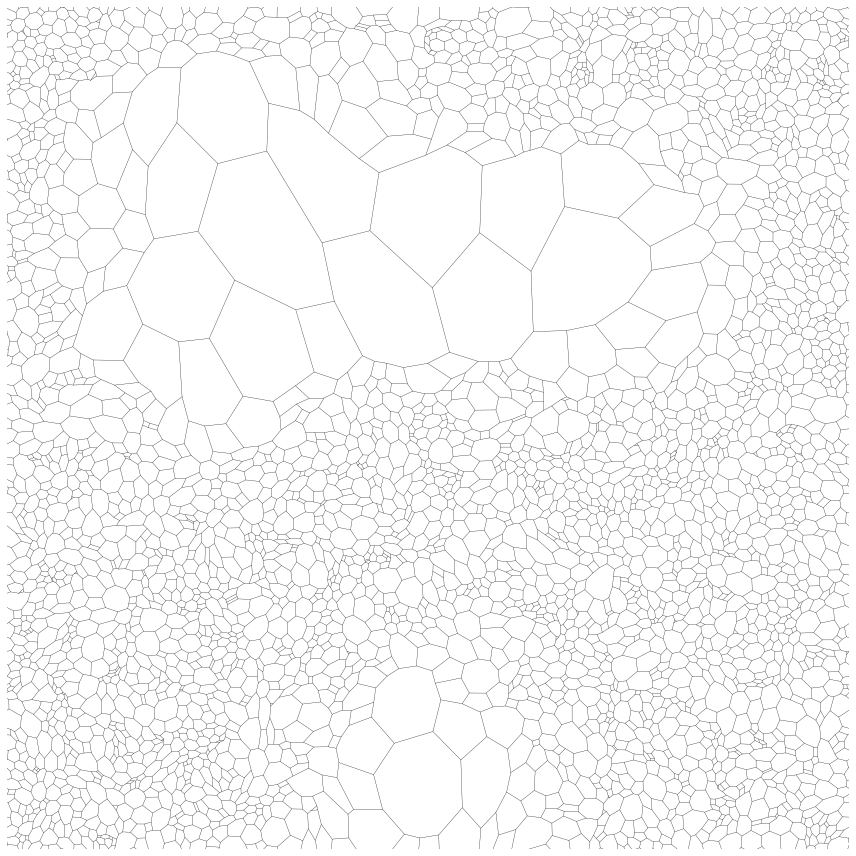

In [17]:
w,h = (11.6929, 11.6929)
fig = plt.figure(frameon=False)
fig.set_size_inches(w,h)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)


# ax.imshow(original_image, extent = (0,1,0,1))
pl.plot_edges(lattice, linewidth = 0.3)
fig.savefig("test.pdf")

In [18]:
from koala import voronization, graph_color
import matplotlib
coloring = graph_color.color_lattice(lattice)
line_colors = [matplotlib.colors.to_hex(a) for a in matplotlib.cm.inferno([0.25, 0.5, 0.75])]

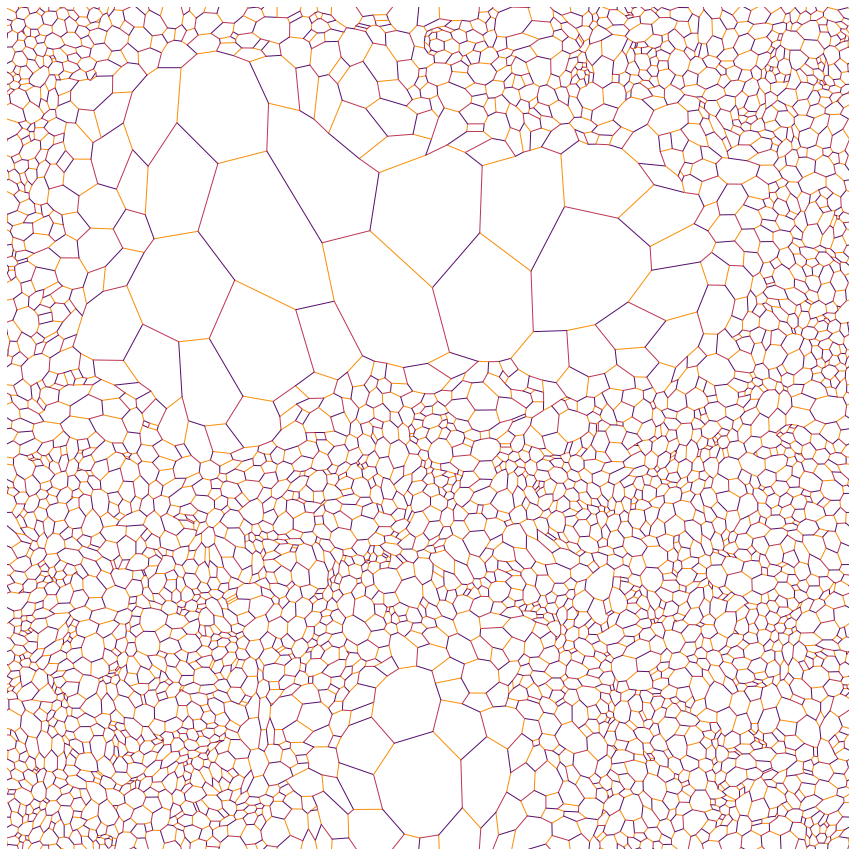

In [19]:
w,h = (11.6929, 11.6929)
fig = plt.figure(frameon=False)
fig.set_size_inches(w,h)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)

# ax.imshow(original_image, extent = (0,1,0,1))
pl.plot_edges(lattice, linewidth = 1, labels = coloring, color_scheme = line_colors)
fig.savefig("test_color.pdf")